#Name - Arjun A.
#Roll number - 181CO109
#Date of submission - 22-01-2021
This notebook was written in google colab. <br>Link to view notebook<br>
https://colab.research.google.com/drive/1ZkSxH5G43ppX86sYiAknBHwRI49YODQ3?usp=sharing


#Machine Learning Lab 2
  Demonstrate working of decision tree based ID3 algorithm, C4.5 algorithm, CART algorithm. Find and compare accuracy of each algorithm. Do tree pruning to prevent over-fitting. Use any dataset as seen fit. 

##Importing required packages

In [1]:
!pip install numpy
!pip install scipy
!pip install -U scikit-learn
!pip install pandas
!pip install graphviz

     |████████████████████████████████| 22.2MB 7.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np 
import pandas as pd 
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.datasets import load_breast_cancer

##Importing data from the breast cancer dataset
Using the load_breast_cancer function from sklearn, importing the breast cancer dataset


In [3]:
# Function to import data
def importdata(): 

  breastcancerData = load_breast_cancer()
  X = breastcancerData.data
  Y = breastcancerData.target
  names = breastcancerData.target_names
  featureName = breastcancerData.feature_names
  print(type(X))
  print(type(Y))
  print(names)
  
  return X, Y, names, featureName

In [4]:
X, Y, bcClassNames, bcFeatureNames = importdata()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['malignant' 'benign']


##Splitting the data into train and test sets
 Splitting the data in the ratio of 7:3. (70% training and 30% testing)

In [5]:
def splitdataset(X, Y): 

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) #Specifying random_state to get the same dataset split everytime 
	
  return X, Y, X_train, X_test, y_train, y_test 

In [6]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(X, Y)

#Use to print the entire dataset
#print(X, Y, X_train, X_test, y_train, y_test, sep = '\n\n')

#Printing size of the split
print('Test dataset size\nX_test -', len(X_test), '\ny_test -', len(y_test), '\n')
print('Train dataset size\nX_train -', len(X_train), '\ny_train -', len(y_train))

Test dataset size
X_test - 171 
y_test - 171 

Train dataset size
X_train - 398 
y_train - 398


##Decision tree - ID3 algorithm
Using sklearn's DecisionTreeClassifier to implement ID3 decision tree algorithm.  <br>
The 'max_depth' parameter is set to 10 i.e maximum depth of the tree is set to 10. <br>
The 'splitter' is set to 'best' to ensure that the attribute with the highest information gain is selected everytime.<br>
The 'random_state' attribute is set to 100 to ensure that the same decision tree is obtained each time.  


In [7]:
modelID3 = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 100)
modelID3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

##Decision tree - C4.5 algorithm
Refer this for program <br>https://github.com/ArjunAnilPillai/scikit-learn-C4.5-tree-classifier.git

In [8]:
#Code to clone package for C4.5 decision tree
!git clone https://github.com/ArjunAnilPillai/scikit-learn-C4.5-tree-classifier.git

Cloning into 'scikit-learn-C4.5-tree-classifier'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 30 (delta 5), reused 11 (delta 5), pack-reused 17
Unpacking objects: 100% (30/30), done.


In [9]:
'''#Code to pull some code from my github
%cd scikit-learn-C4.5-tree-classifier/ 
!ls
!git pull
%cd ..
!ls'''

'#Code to pull some code from my github\n%cd scikit-learn-C4.5-tree-classifier/ \n!ls\n!git pull\n%cd ..\n!ls'

In [10]:
import sys
sys.path.append('/content/scikit-learn-C4.5-tree-classifier')

In [11]:
from c45 import C45
modelC45 = C45(bcFeatureNames)
modelC45.fit(X_train, y_train)

C45(attrNames=['meanradius', 'meantexture', 'meanperimeter', 'meanarea',
               'meansmoothness', 'meancompactness', 'meanconcavity',
               'meanconcavepoints', 'meansymmetry', 'meanfractaldimension',
               'radiuserror', 'textureerror', 'perimetererror', 'areaerror',
               'smoothnesserror', 'compactnesserror', 'concavityerror',
               'concavepointserror', 'symmetryerror', 'fractaldimensionerror',
               'worstradius', 'worsttexture', 'worstperimeter', 'worstarea',
               'worstsmoothness', 'worstcompactness', 'worstconcavity',
               'worstconcavepoints', 'worstsymmetry', 'worstfractaldimension'])

##Decision tree - CART algorithm
Using sklearn's DecisionTreeClassifier to implement CART decision tree algorithm.  <br>
The 'maxdepth' parameter is set to 10 i.e maximum depth of the tree is set to 10. <br>
The 'splitter' is set to 'best' to ensure that the attribute with the highest gini index is selected everytime.<br>
The 'random_state' attribute is set to 100 to ensure that the same decision tree is obtained each time.  

In [12]:
modelCART = DecisionTreeClassifier(criterion = 'gini',splitter = 'best', random_state = 100)
modelCART.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

##Function to print accuracy 
Using sklearn's classification_report and accuracy_score.

In [13]:
def measuringAccuracy(Y_train, y_test, y_predict_train, y_predict_test):
  print('Accuracy with train data -', (accuracy_score(y_train, y_predict_train) * 100))
  print('Accuracy with test data -', (accuracy_score(y_test, y_predict_test) * 100))
  print('\nReport for test data\n', classification_report(y_test, y_predict_test))

##Calculating accuracy and generating report for the different algorithms

###For ID3 decision tree

ID3 decision tree
Accuracy with train data - 100.0
Accuracy with test data - 91.81286549707602

Report for test data
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        69
           1       0.92      0.94      0.93       102

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



'ID3_Decision_tree_before_pruning.pdf'

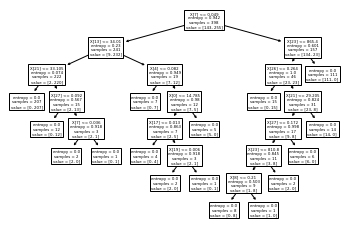

In [14]:
#ID3 decision tree
print("ID3 decision tree")
y_predID3 = modelID3.predict(X_test)
y_predID3_train = modelID3.predict(X_train)
measuringAccuracy(y_train, y_test, y_predID3_train, y_predID3)
plot_tree(modelID3)

#Graphviz for drawing tree
dot_data = export_graphviz(modelID3, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ID3_Decision_tree_before_pruning")

###For C4.5 decision tree

In [15]:
#C45 decision tree
print("C45 decision tree")
y_predictC45 = modelC45.predict(X_test)
y_predictC45_train = modelC45.predict(X_train)
measuringAccuracy(y_train , y_test, y_predictC45_train, y_predictC45)

#Printing XML for the decision tree and copying into .txt file
xmlC45String, xmlC45 = modelC45.printTree()
print(xmlC45String)

# Write xml into file
with open('/content/C45_Decision_tree_before_pruning.txt', 'w') as writefile:
  writefile.write(xmlC45String)

C45 decision tree
Accuracy with train data - 100.0
Accuracy with test data - 90.05847953216374

Report for test data
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        69
           1       0.88      0.96      0.92       102

    accuracy                           0.90       171
   macro avg       0.91      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171

<?xml version="1.0" ?>
<DecisionTree>
	<worstperimeter flag="l" p="0.709" value="114.6">
		<worstconcavepoints flag="l" p="0.926" value="0.1521">
			<symmetryerror flag="l" p="0.004" value="0.009539">0</symmetryerror>
			<symmetryerror flag="r" p="0.996" value="0.009539">
				<meanarea flag="l" p="0.973" value="701.9">
					<worstconcavepoints flag="l" p="0.901" value="0.1225">
						<radiuserror flag="l" p="0.982" value="0.645">
							<worsttexture flag="l" p="0.933" value="33.37">1</worsttexture>
							<worsttexture flag="r" p="0.067" value="33.

###For CART decision tree

CART decision tree
Accuracy with train data - 100.0
Accuracy with test data - 95.32163742690058

Report for test data
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        69
           1       0.95      0.97      0.96       102

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



'CART_Decision_tree_before_pruning.pdf'

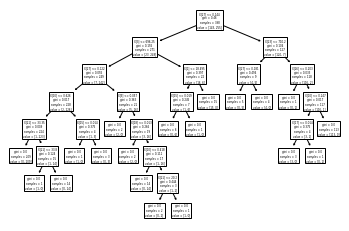

In [16]:
#CART decision tree
print("CART decision tree")
y_predCART = modelCART.predict(X_test)
y_predCART_train = modelCART.predict(X_train)
measuringAccuracy(y_train, y_test, y_predCART_train, y_predCART)
plot_tree(modelCART)

#Graphviz for drawing tree
dot_data = export_graphviz(modelCART, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("CART_Decision_tree_before_pruning") 

##Doing post-pruning for the decision trees 
This is done using Cost Complexity Pruning which is provided by sci-kit learn

###For ID3

Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

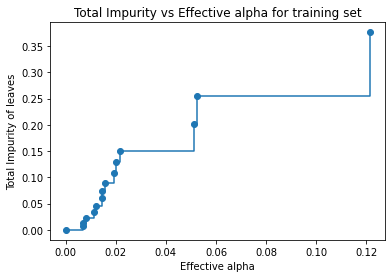

In [17]:
#ID3 Decision tree classifier
modelID3 = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 100)

#Calculatiing ccp_alphas
path = modelID3.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plotting ccp_alphas vs total impurity of the leaf nodes
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total Impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for training set")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', random_state = 100, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Printing out the tree with just the root node
print("Number of nodes in the last tree is {} with ccp_alpha = {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is 1 with ccp_alpha = 0.5657584829243165


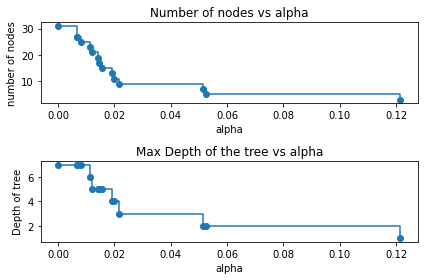

In [19]:
#Getting rid of this trivial tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Plotting number of nodes vs alpha and max depth vs alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = "steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = "steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Max Depth of the tree vs alpha")
fig.tight_layout()

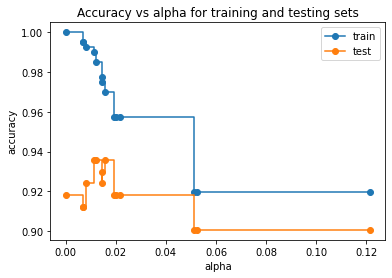

In [20]:
#Finding test and train prediction accuracy scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#Plotting accuracy vs alpha for test and train
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
index_best_model = np.argmax(test_scores)
modelID3 = clfs[index_best_model]

###For C4.5

In [22]:
#Trying to find optimum depth 
clfs = []
clfsTrain = []

clf = C45(bcFeatureNames)
clf.fit_fixed_depth(X_train, y_train, 1)
clfs.append(accuracy_score(y_test, clf.predict(X_test)))
clfsTrain.append(accuracy_score(y_train, clf.predict(X_train)))
modelC45 = clf
cur_acc = clfs[-1]
depth = 1

for i in range(2, 10):
  clf = C45(bcFeatureNames)
  clf.fit_fixed_depth(X_train, y_train, i)
  clfs.append(accuracy_score(y_test, clf.predict(X_test)))
  clfsTrain.append(accuracy_score(y_train, clf.predict(X_train)))
  cur_acc_model = clfs[-1]
  if cur_acc_model > cur_acc:
    cur_acc = cur_acc_model
    modelC45 = clf
    depth = i

x_axis = [i for i in range(1, 10)]

Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

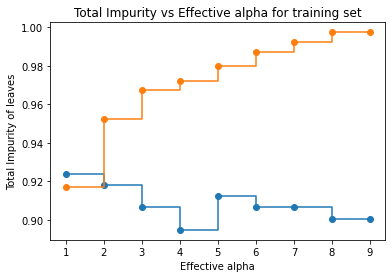

In [23]:
#Plotting graph for max_depth 
fig, ax = plt.subplots()
ax.plot(x_axis, clfs, marker='o', drawstyle="steps-post", label = "test")
ax.plot(x_axis, clfsTrain, marker='o', drawstyle="steps-post", label = "train")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total Impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for training set")

###For CART

Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

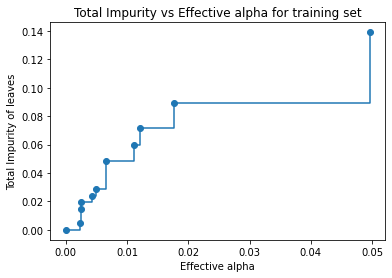

In [24]:
#CART Decision tree classifier
modelCART = DecisionTreeClassifier(criterion = 'gini',splitter = 'best', random_state = 100)

#Calculatiing ccp_alphas
path = modelCART.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plotting ccp_alphas vs total impurity of the leaf nodes
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total Impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for training set")

In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion = 'gini',splitter = 'best', random_state = 100, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Printing out the tree with just the root node
print("Number of nodes in the last tree is {} with ccp_alpha = {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is 1 with ccp_alpha = 0.32139929300012127


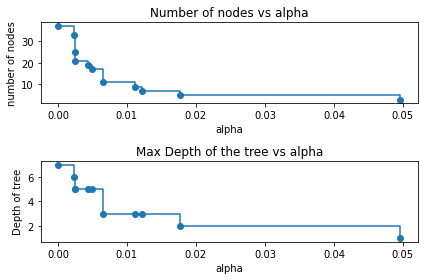

In [26]:
#Getting rid of this trivial tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Plotting number of nodes vs alpha and max depth vs alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker = 'o', drawstyle = "steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker = 'o', drawstyle = "steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Max Depth of the tree vs alpha")
fig.tight_layout()

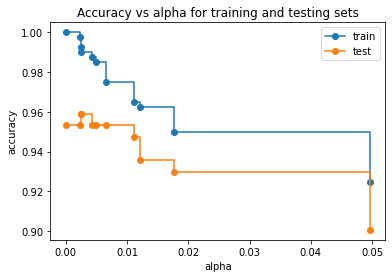

In [27]:
#Finding test and train prediction accuracy scores
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

#Plotting accuracy vs alpha for test and train
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [28]:
index_best_model = np.argmax(test_scores)
modelCART = clfs[index_best_model]

##Calculating accuracy and generating report for the different algorithms after pruning 

###For ID3 decision tree

ID3 decision tree
Accuracy with train data - 98.99497487437185
Accuracy with test data - 93.56725146198829

Report for test data
               precision    recall  f1-score   support

           0       0.95      0.88      0.92        69
           1       0.93      0.97      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



'ID3_Decision_tree_after_pruning.pdf'

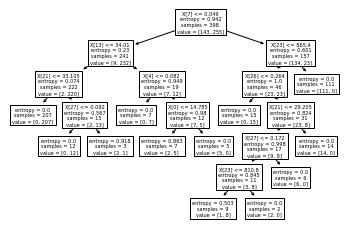

In [29]:
#ID3 decision tree
print("ID3 decision tree")
y_predID3 = modelID3.predict(X_test)
y_predID3_train = modelID3.predict(X_train)
measuringAccuracy(y_train, y_test, y_predID3_train, y_predID3)
plot_tree(modelID3)

#Graphviz for drawing tree
dot_data = export_graphviz(modelID3, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ID3_Decision_tree_after_pruning")

###For C4.5 decision tree

In [30]:
#C45 decision tree
print("C45 decision tree")
y_predictC45 = modelC45.predict(X_test)
y_predictC45_train = modelC45.predict(X_train)
measuringAccuracy(y_train , y_test, y_predictC45_train, y_predictC45)


#Printing XML for the decision tree and copying into .txt file
xmlC45String, xmlC45 = modelC45.printTree()
print(xmlC45String)

# Write xml into file
with open('/content/C45_Decision_tree_after_pruning.txt', 'w') as writefile:
  writefile.write(xmlC45String)

C45 decision tree
Accuracy with train data - 91.70854271356784
Accuracy with test data - 92.39766081871345

Report for test data
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        69
           1       0.90      0.98      0.94       102

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

<?xml version="1.0" ?>
<DecisionTree>
	<worstperimeter flag="l" p="0.709" value="114.6">1</worstperimeter>
	<worstperimeter flag="r" p="0.291" value="114.6">0</worstperimeter>
</DecisionTree>



###For CART decision tree

CART decision tree
Accuracy with train data - 99.2462311557789
Accuracy with test data - 95.90643274853801

Report for test data
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        69
           1       0.95      0.98      0.97       102

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



'CART_Decision_tree_after_pruning.pdf'

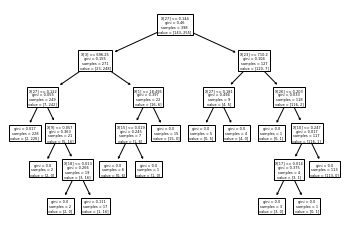

In [31]:
#CART decision tree
print("CART decision tree")
y_predCART = modelCART.predict(X_test)
y_predCART_train = modelCART.predict(X_train)
measuringAccuracy(y_train, y_test, y_predCART_train, y_predCART)
plot_tree(modelCART)

#Graphviz for drawing tree
dot_data = export_graphviz(modelCART, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("CART_Decision_tree_after_pruning") 